In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as skmetrics
from imblearn.over_sampling import RandomOverSampler


In [23]:
df_magic = pd.read_csv('.\\data\\magic04.data', header=None)
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
        'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df_magic.columns = cols


In [24]:
df_magic.head(10)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [25]:
df_magic['class'] = df_magic['class'].map({'g': 1, 'h': 0})


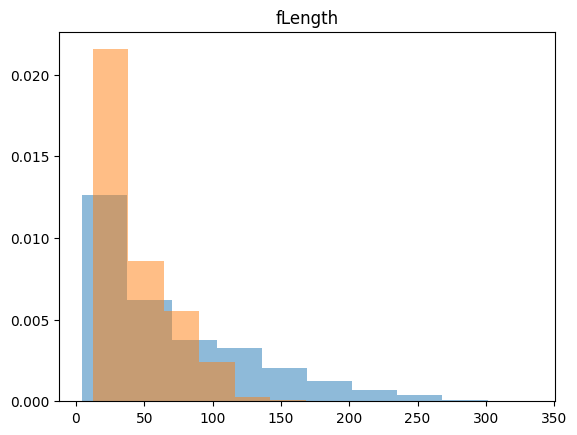

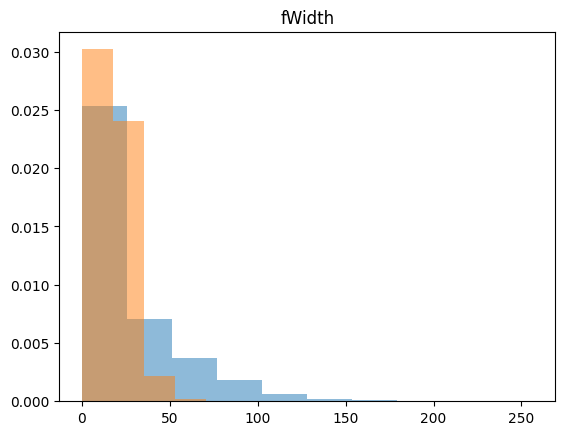

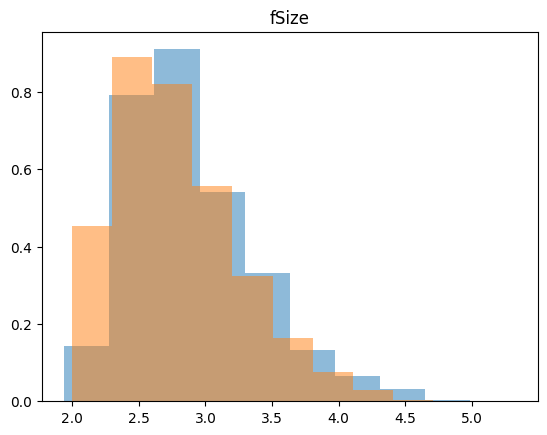

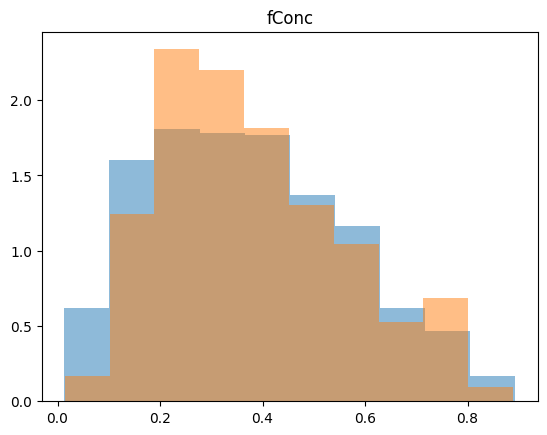

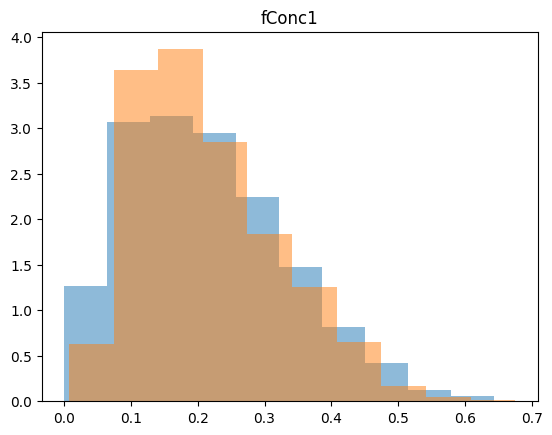

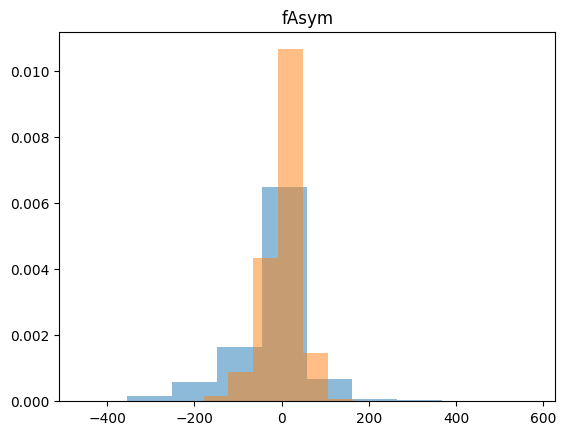

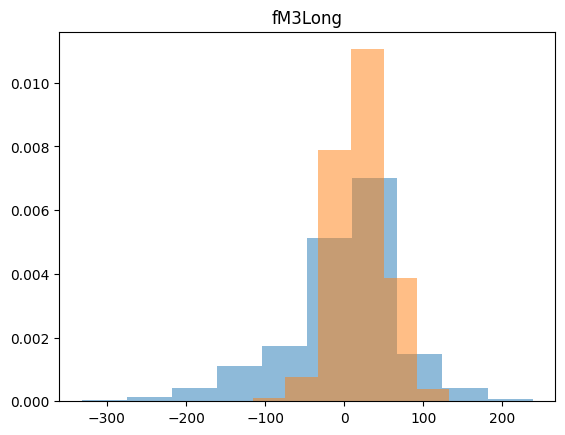

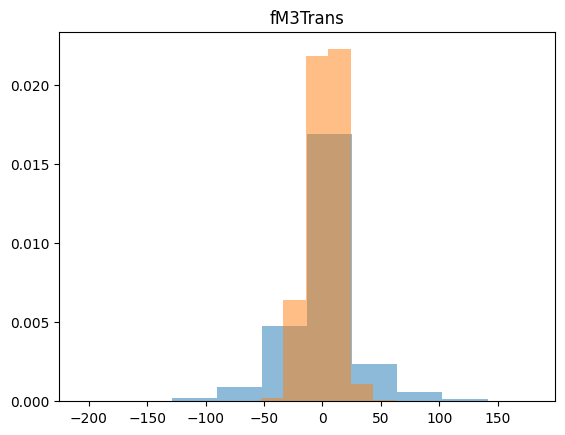

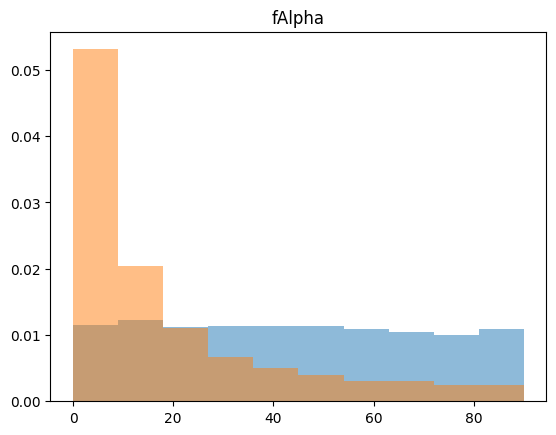

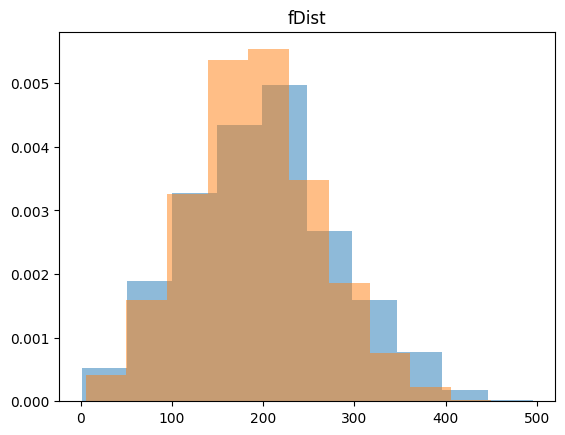

In [26]:
# print class histogram
for label in cols[:-1]:
    plt.hist(df_magic[df_magic['class'] == 0][label], density=True, alpha=0.5)
    plt.hist(df_magic[df_magic['class'] == 1][label], density=True, alpha=0.5)
    plt.title(label)
    plt.show()


In [27]:
train, valid, test = np.split(df_magic.sample(
    frac=1), [int(.6*len(df_magic)), int(.8*len(df_magic))])


In [34]:
def scale_data(df, oversample=False):
    X = df_magic.drop('class', axis=1)
    y = df_magic['class']

    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)
    data = np.hstack((X, y.values.reshape(-1, 1)))
    if oversample:
        ros = RandomOverSampler(random_state=0)
        X, y = ros.fit_resample(X, y)

    return data, X, y


In [35]:
train, X_train, y_train = scale_data(df_magic, oversample=True)
valid, X_valid, y_valid = scale_data(valid)
test, X_test, y_test = scale_data(test)
